In [4]:
# Hidden
from datascience import *
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
%matplotlib inline

This workbook shows a example derived from the EDA exercise in Chapter 2 of Doing Data Science, by o'Neil abd Schutt

In [5]:
clicks = Table.read_table("http://stat.columbia.edu/~rachel/datasets/nyt1.csv")
clicks

Age,Gender,Impressions,Clicks,Signed_In
36,0,3,0,1
73,1,3,0,1
30,0,3,0,1
49,1,3,0,1
47,1,11,0,1
47,0,11,1,1
0,0,7,1,0
46,0,5,0,1
16,0,3,0,1
52,0,4,0,1


Well.  Half a million rows.  That would be painful in excel.

Add a column of 1's, so that a sum will count people.

In [7]:
age_upper_bounds = [18, 25, 35, 45, 55, 65]

def age_range(n):
    if n == 0:
        return '0'
    lower = 1
    for upper in age_upper_bounds:
        if lower <= n < upper:
            return str(lower) + '-' + str(upper-1)
        lower = upper
    return str(lower) + '+'

# a little test
np.unique([age_range(n) for n in range(100)])

array(['0', '1-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
      dtype='<U5')

In [8]:
clicks["Age Range"] = clicks.apply(age_range, 'Age')
clicks["Person"] = 1
clicks

Age,Gender,Impressions,Clicks,Signed_In,Age Range,Person
36,0,3,0,1,35-44,1
73,1,3,0,1,65+,1
30,0,3,0,1,25-34,1
49,1,3,0,1,45-54,1
47,1,11,0,1,45-54,1
47,0,11,1,1,45-54,1
0,0,7,1,0,0,1
46,0,5,0,1,45-54,1
16,0,3,0,1,1-17,1
52,0,4,0,1,45-54,1


Now we can group the table by `Age Range` and count how many clicks come from each range.

In [18]:
clicks_by_age = clicks.group('Age Range', sum)
clicks_by_age

Age Range,Age sum,Gender sum,Impressions sum,Clicks sum,Signed_In sum,Person sum
0,0,0,685483,19480,0,137106
1-17,211045,9470,69239,2065,13828,13828
18-24,847791,21721,203585,2167,40694,40694
25-34,1716328,30958,290511,2937,58174,58174
35-44,2798593,37676,355824,3662,70860,70860
45-54,3181779,34007,322109,3232,64288,64288
55-64,2661830,23988,224688,4556,44738,44738
65+,2098644,10445,144120,4350,28753,28753


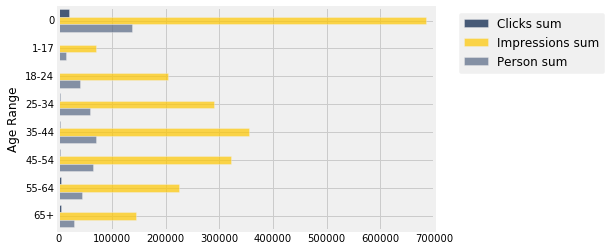

In [19]:
clicks_by_age.select(['Age Range', 'Clicks sum', 'Impressions sum', 'Person sum']).barh('Age Range')

Now we can do some other interesting summaries of these categories

In [20]:
clicks_by_age['Gender Mix'] = clicks_by_age['Gender sum'] / clicks_by_age['Person sum']
clicks_by_age["CTR"] = clicks_by_age['Clicks sum'] / clicks_by_age['Impressions sum']
clicks_by_age.select(['Age Range', 'Person sum', 'Gender Mix', 'CTR'])

Age Range,Person sum,Gender Mix,CTR
0,137106,0,0.0284179
1-17,13828,0.684842,0.0298242
18-24,40694,0.533764,0.0106442
25-34,58174,0.532162,0.0101098
35-44,70860,0.531696,0.0102916
45-54,64288,0.528979,0.0100339
55-64,44738,0.536188,0.020277
65+,28753,0.363266,0.0301832


In [26]:
# Format some columns as percent with limited precision
clicks_by_age.set_format('Gender Mix', PercentFormatter(1))
clicks_by_age.set_format('CTR', PercentFormatter(2))
clicks_by_age

Age Range,Age sum,Gender sum,Impressions sum,Clicks sum,Signed_In sum,Person sum,Gender Mix,CTR
0,0,0,685483,19480,0,137106,0.0%,2.84%
1-17,211045,9470,69239,2065,13828,13828,68.5%,2.98%
18-24,847791,21721,203585,2167,40694,40694,53.4%,1.06%
25-34,1716328,30958,290511,2937,58174,58174,53.2%,1.01%
35-44,2798593,37676,355824,3662,70860,70860,53.2%,1.03%
45-54,3181779,34007,322109,3232,64288,64288,52.9%,1.00%
55-64,2661830,23988,224688,4556,44738,44738,53.6%,2.03%
65+,2098644,10445,144120,4350,28753,28753,36.3%,3.02%


We might want to do the click rate calculation a little more carefully.  We don't care about clicks where there are zero impressions or missing age/gender information.  So let's filter those out of our data set.

In [27]:
impressed = clicks.where(clicks['Age'] > 0).where('Impressions')
impressed

Age,Gender,Impressions,Clicks,Signed_In,Age Range,Person
36,0,3,0,1,35-44,1
73,1,3,0,1,65+,1
30,0,3,0,1,25-34,1
49,1,3,0,1,45-54,1
47,1,11,0,1,45-54,1
47,0,11,1,1,45-54,1
46,0,5,0,1,45-54,1
16,0,3,0,1,1-17,1
52,0,4,0,1,45-54,1
21,0,3,0,1,18-24,1


In [32]:
# Impressions by age and gender
impressed.pivot(rows='Gender', columns='Age Range', values='Impressions', collect=sum)

Gender,1-17,18-24,25-34,35-44,45-54,55-64,65+
0,21800,95057,136292,166324,151650,104220,91956
1,47439,108528,154219,189500,170459,120468,52164


In [39]:
impressed.pivot("Age Range", "Gender", "Clicks",sum)

Gender,1-17,18-24,25-34,35-44,45-54,55-64,65+
0,683,1002,1388,1707,1542,2105,2765
1,1382,1165,1549,1955,1690,2451,1585


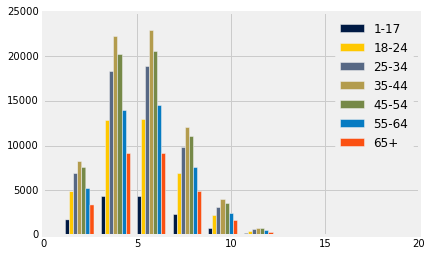

In [40]:
impressed.pivot_hist('Age Range','Impressions')

In [34]:
distributions = impressed.pivot_bin('Age Range','Impressions')
distributions

bin,1-17,18-24,25-34,35-44,45-54,55-64,65+
1,1674,4833,6862,8206,7546,5183,3345
2.9,4345,12833,18382,22260,20230,14025,9131
4.8,4346,13000,18861,22895,20586,14548,9120
6.7,2358,6952,9801,12094,11050,7595,4957
8.6,799,2237,3117,3981,3517,2486,1607
10.5,179,456,671,814,787,530,326
12.4,24,87,95,130,116,90,62
14.3,7,8,11,12,12,5,8
16.2,0,2,1,1,1,0,0
18.1,0,0,0,1,0,0,0


In [35]:
impressed['Gen'] = [['Male','Female'][i] for i in impressed['Gender']]
impressed

Age,Gender,Impressions,Clicks,Signed_In,Age Range,Person,Gen
36,0,3,0,1,35-44,1,Male
73,1,3,0,1,65+,1,Female
30,0,3,0,1,25-34,1,Male
49,1,3,0,1,45-54,1,Female
47,1,11,0,1,45-54,1,Female
47,0,11,1,1,45-54,1,Male
46,0,5,0,1,45-54,1,Male
16,0,3,0,1,1-17,1,Male
52,0,4,0,1,45-54,1,Male
21,0,3,0,1,18-24,1,Male


Group returns a new table.  If we wanted to specify the formats on columns of this table, assign it to a name.

In [38]:
# How does gender and clicks vary with age?
gi = impressed.group('Age Range', np.mean).select(['Age Range', 'Gender mean', 'Clicks mean'])
gi.set_format(['Gender mean', 'Clicks mean'], PercentFormatter)
gi

Age Range,Gender mean,Clicks mean
1-17,68.45%,15.04%
18-24,53.40%,5.36%
25-34,53.20%,5.08%
35-44,53.17%,5.20%
45-54,52.92%,5.06%
55-64,53.60%,10.25%
65+,36.33%,15.23%
